# 🚜 Predicting the Sale Price for Bulldozers using Machine Learning

# 1.Problem Definition
* How well we can predict the future sale price of a bulldozer, given the historical data.

# 2. Data
There are 3 types of different dataset provided from Kaggle, we know that that it's a time series problem as there is a time attribute.

* Train.csv is the training set, which contains data through the end of 2011.
* 
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard
* 
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competitio

# 3. Evaluation
* Evaluation metric that must be used is RMSLE, root mean squared log error.
* With many evaluations, the goal is to reduce this error.

# 4. Features
* A Data dictionary is provided by Kaggle for this project, we'll look into it and explore the data moving forwards.n.

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

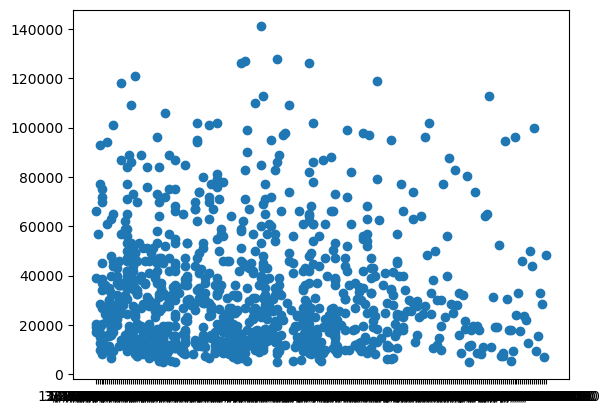

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<Axes: ylabel='Frequency'>

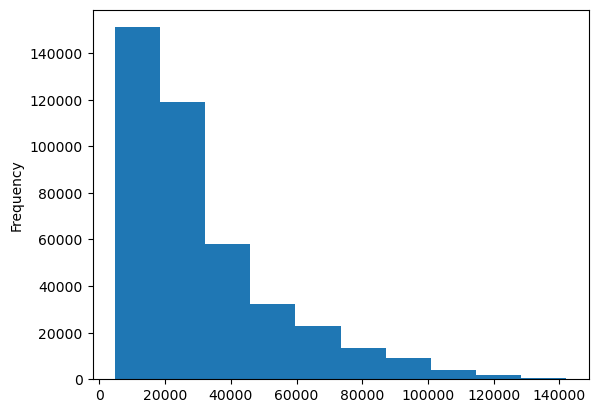

In [6]:
df.SalePrice.plot.hist()

In [7]:
df = pd.read_csv('data/TrainAndValid.csv', parse_dates=['saledate'], low_memory=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

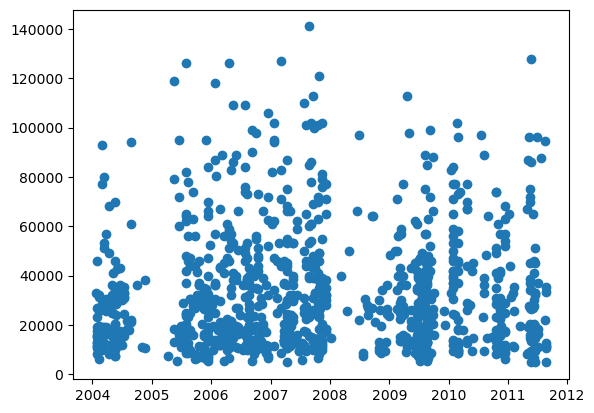

In [9]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [10]:
df.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [13]:
df.sort_values(by=['saledate'], inplace=True,  ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original DF

In [14]:
df_tmp = df.copy()

## Now we will enrich our temp df and manipulate in the way we want without altering the original df

In [15]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year

In [16]:
df_tmp['saleMonth'] = df_tmp.saledate.dt.month

In [17]:
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayofweek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayofyear'] = df_tmp.saledate.dt.dayofyear

df_tmp.drop('saledate', axis=1, inplace=True)

In [18]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [19]:
df_tmp['dayName'] = df.saledate.dt.day_name

In [20]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [21]:
df_tmp.drop('dayName', axis=1, inplace=True)

In [22]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [23]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [102]:
train_df = df_tmp[df_tmp.saleYear < 2012].copy()
train_df.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
393098    2011
400217    2011
400302    2011
400393    2011
393123    2011
Name: saleYear, Length: 401125, dtype: int32

In [103]:
len(train_df)

401125

In [104]:
valid_df = df_tmp[df_tmp.saleYear >= 2012].copy()
valid_df.saleYear

405675    2012
401133    2012
406076    2012
409018    2012
409026    2012
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 11573, dtype: int32

In [105]:
len(valid_df)

11573

* EDA: Exploratory Data Analysis

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(train_df.drop('SalePrice', axis=1), train_df.SalePrice)

ValueError: could not convert string to float: 'Low'

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 393123
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  float64
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   fiModelDesc               401125 non-null  object 
 10  fiBaseModel               401125 non-null  object 
 11  fiSecondaryDesc           263934 non-null  object 
 12  fiModelSeries             56908 non-null   object 
 13  fiModelDescriptor         71919 non-null   o

In [107]:
train_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [108]:
for label, content in train_df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [152]:
for label, content in valid_df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


## Converting objects to categories

In [111]:
for label, content in train_df.items():
    if pd.api.types.is_object_dtype(content):
        train_df[label] = content.astype('category').cat.as_ordered()

In [153]:
for label, content in valid_df.items():
    if pd.api.types.is_object_dtype(content):
        valid_df[label] = content.astype('category').cat.as_ordered()

In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 75.7 MB


In [155]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 405675 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   11573 non-null  int64   
 1   SalePrice                 11573 non-null  float64 
 2   MachineID                 11573 non-null  int64   
 3   ModelID                   11573 non-null  int64   
 4   datasource                11573 non-null  int64   
 5   auctioneerID              11573 non-null  float64 
 6   YearMade                  11573 non-null  int64   
 7   MachineHoursCurrentMeter  4739 non-null   float64 
 8   UsageBand                 4031 non-null   category
 9   fiModelDesc               11573 non-null  category
 10  fiBaseModel               11573 non-null  category
 11  fiSecondaryDesc           8037 non-null   category
 12  fiModelSeries             1759 non-null   category
 13  fiModelDescriptor         2897 non-null   cat

In [113]:
train_df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [156]:
valid_df.state.cat.categories

Index(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object')

In [114]:
train_df.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
393098    31
400217    31
400302    31
400393    31
393123    31
Length: 401125, dtype: int8

In [115]:
train_df.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.626027
UsageBand                   0.803217
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.332425
fiModelSeries               0.834065
fiModelDescriptor           0.797692
ProductSize                 0.510725
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.719083
Enclosure                   0.000788
Forks                       0.506540
Pad_Type                    0.780210
Ride_Control                0.611874
Stick                       0.780210
Transmission                0.527977
Turbocharged                0.780210
B

### Saving processed data

In [116]:
train_df.to_csv('./data/train_tmp.csv', index=False)

In [157]:
valid_df.to_csv('./data/valid_tmp.csv', index=False)

In [179]:
valid_df = pd.read_csv('./data/valid_tmp.csv', low_memory=False)
valid_df.head().T

,0,1,2,3,4
SalesID,4449186,1222855,6258613,6282680,6282759
SalePrice,46173.2,66000.0,26800.0,42100.0,62100.0
MachineID,2318824,531393,1810917,1543404,1863077
ModelID,26964,23926,13260,1830,11390
datasource,173,121,149,149,149
auctioneerID,99.0,3.0,99.0,99.0,99.0
YearMade,1996,1000,2000,2004,2006
MachineHoursCurrentMeter,0.0,8145.0,24.0,4373.0,3467.0
UsageBand,NaN,Low,Low,Medium,Medium
fiModelDesc,D65E12,12HNA,590SUPER LII,120C,160CLC


In [117]:
train_df= pd.read_csv('./data/train_tmp.csv', low_memory=False)
train_df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [118]:
train_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

## Fill numeric values

In [119]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [180]:
for label, content in valid_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [171]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [181]:
for label, content in valid_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            valid_df[label + '_is_missing'] = pd.isnull(content)

            valid_df[label] = content.fillna(content.median())

In [182]:
valid_df.head().T

,0,1,2,3,4
SalesID,4449186,1222855,6258613,6282680,6282759
SalePrice,46173.2,66000.0,26800.0,42100.0,62100.0
MachineID,2318824,531393,1810917,1543404,1863077
ModelID,26964,23926,13260,1830,11390
datasource,173,121,149,149,149
auctioneerID,99.0,3.0,99.0,99.0,99.0
YearMade,1996,1000,2000,2004,2006
MachineHoursCurrentMeter,0.0,8145.0,24.0,4373.0,3467.0
UsageBand,NaN,Low,Low,Medium,Medium
fiModelDesc,D65E12,12HNA,590SUPER LII,120C,160CLC


In [121]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column to tell if the data was missing or not
            train_df[label+'_is_missing'] = pd.isnull(content)
            # fill missing values with median as it is more robust than man
            train_df[label] =  content.fillna(content.median())

In [122]:
train_df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [123]:
for label, content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [124]:
for label, content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_df[label + '_is_missing'] = pd.isnull(content)
        train_df[label] = pd.Categorical(content).codes + 1

In [176]:
for label, content in valid_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        valid_df[label + '_is_missing'] = pd.isnull(content)
        valid_df[label] = pd.Categorical(content).codes + 1

In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 75.7 MB


In [126]:
train_df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [127]:
train_df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [128]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_jobs=-1, random_state = 42)

model.fit(train_df.drop('SalePrice', axis=1), train_df['SalePrice'])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [129]:
model.score(train_df.drop('SalePrice', axis=1), train_df['SalePrice'])

0.987515142490979

In [130]:
train_df['saleYear']

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saleYear, Length: 401125, dtype: int64

In [177]:
X_train, y_train = train_df.drop('SalePrice', axis=1), train_df.SalePrice
X_valid, y_valid = valid_df.drop('SalePrice', axis=1), valid_df.SalePrice

In [132]:
X_train.T

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6311722,6261568,6261027,6261980,6260754,6260687,6312170,6312727,6315051,6260878
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1847105,1891153,434680,1557037,1907502,1074871,1812622,1811599,1858173,1799594
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,9580,4089,3538,1211,4333,4331,9580,9580,17432,4102
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True,...,True,True,True,True,False,False,True,True,True,True


In [133]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In [165]:
X_valid.T

,0,1,2,3,4,5,6,7,8,9,...,11563,11564,11565,11566,11567,11568,11569,11570,11571,11572
SalesID,4449186,1222855,6258613,6282680,6282759,1222845,6305054,1222879,1222867,1222865,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
MachineID,2318824,531393,1810917,1543404,1863077,1032841,1851308,1063944,1012231,1021791,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,26964,23926,13260,1830,11390,4701,385,8851,28540,22653,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,173,121,149,149,149,121,149,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,99.0,3.0,99.0,99.0,99.0,3.0,99.0,3.0,3.0,3.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
Differential_Type_is_missing,True,True,True,True,True,False,True,True,True,True,...,False,True,True,False,True,True,True,True,True,False


## Building an evaluation function

In [167]:
# We are using RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        'Training MAE': mean_absolute_error(y_train, train_preds),
        'Valid MAE': mean_absolute_error(y_valid, val_preds),
        'Training RMSLE': rmsle(y_train, train_preds),
        'Valid RMSLE': rmsle(y_valid, val_preds),
        'Training R^2': model.score(X_train, y_train),
        'Valid R^2': model.score(X_valid, y_valid)
    }
    return scores
    

 

In [135]:
model = RandomForestRegressor(n_jobs = -1,
                             random_state=42,
                              max_samples=10000
                             )
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [178]:
show_scores(model)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [183]:
set(X_train.columns) - set(X_valid.columns)

{'auctioneerID_is_missing'}

In [184]:
X_valid['auctioneerID_is_missing'] = False
X_valid.head().T

,0,1,2,3,4
SalesID,4449186,1222855,6258613,6282680,6282759
MachineID,2318824,531393,1810917,1543404,1863077
ModelID,26964,23926,13260,1830,11390
datasource,173,121,149,149,149
auctioneerID,99.0,3.0,99.0,99.0,99.0
...,...,...,...,...,...
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,True,True
Steering_Controls_is_missing,True,True,True,True,True


In [187]:
X_valid = X_valid[X_train.columns]

## Hyperparameter Tuning


In [150]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1.0, 'sqrt'],
    'max_samples': [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rs_grid,
                             n_iter=4,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=4,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [137]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 3}

In [145]:
show_scores(rs_model)

{'Training MAE': 13406.06592589543,
 'Training RMSLE': 0.5647799903237224,
 'Training R^2': 0.34455372382478444}

## Training a model with best params

In [146]:
ideal_model = RandomForestRegressor(n_estimators=10,
                                   min_samples_split=2,
                                   min_samples_leaf=17,
                                   max_samples=10000,
                                   max_features='sqrt',
                                   max_depth=3)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', max_samples=10000,
                      min_samples_leaf=17, n_estimators=10)

In [188]:
show_scores(ideal_model)

{'Training MAE': 13433.301523489108,
 'Valid MAE': 15959.688523745184,
 'Training RMSLE': 0.5647936259808578,
 'Valid RMSLE': 0.5963224345642787,
 'Training R^2': 0.3346466367590797,
 'Valid R^2': 0.29051042965704654}

In [189]:
ideal_model.feature_importances_

array([0.00000000e+00, 1.64554873e-02, 1.01471397e-02, 2.00099023e-03,
       1.19116616e-03, 5.77625914e-02, 4.47944472e-04, 0.00000000e+00,
       6.42472466e-03, 5.65983685e-03, 1.49326827e-02, 0.00000000e+00,
       1.21826525e-01, 5.20800906e-02, 3.89637687e-02, 1.54206982e-06,
       0.00000000e+00, 5.15875341e-02, 1.04351658e-03, 6.68167108e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.84909406e-02,
       0.00000000e+00, 0.00000000e+00, 3.58983143e-02, 0.00000000e+00,
       4.40104473e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.70240267e-02, 4.37689583e-05, 0.00000000e+00,
       1.36693351e-02, 1.68092271e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.14864151e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.06156095e-06, 0.00000000e+00, 0.00000000e+00, 2.44065855e-04,
      

In [191]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 178.6 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/294.9 kB 245.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 275.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 312.2 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 341.3 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 339.7 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 380.8 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/294.9 kB 385.7 kB

In [192]:
import seaborn as sns

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importance': importances}).sort_values('feature_importance', ascending=False).reset_index(drop=True))
    sns.barplot(x='feature_importance', y='features', data=df[:n],orient='h')

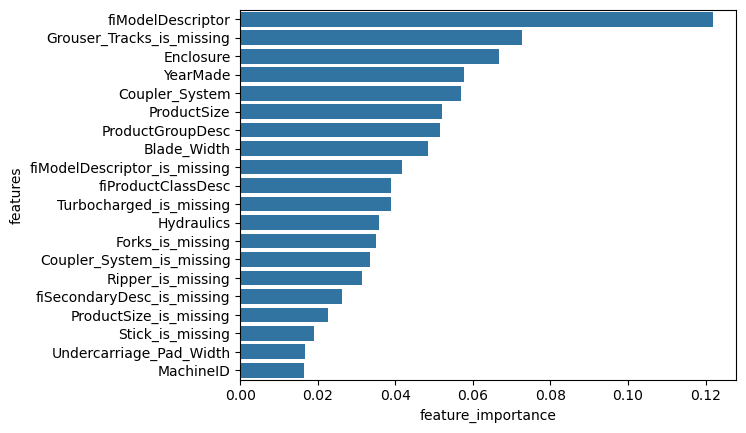

In [193]:
plot_features(X_train.columns, ideal_model.feature_importances_)

SyntaxError: invalid syntax (1844683407.py, line 1)